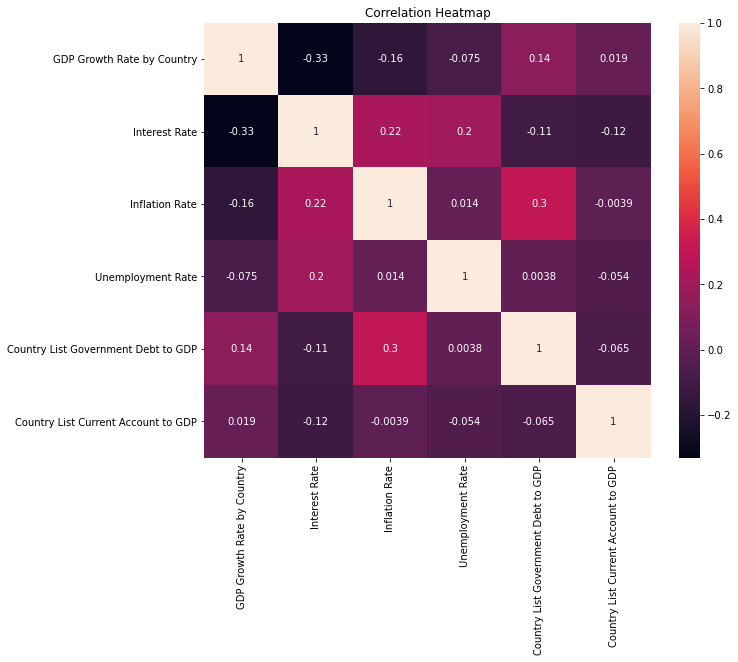

C:\Users\mehdi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


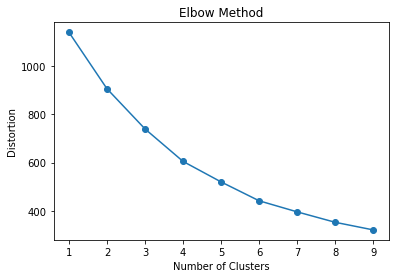

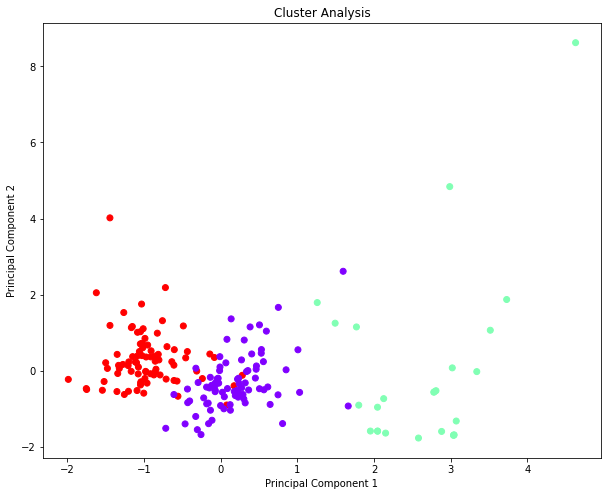

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read the cleaned data
data = pd.read_csv('cleaned.csv')
data.rename(columns={0: 'Country'}, inplace=True)

# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True,)
plt.title('Correlation Heatmap')
plt.show()

# Perform clustering analysis
X = data[numeric_columns].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# Fit K-means with the best number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Cluster Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


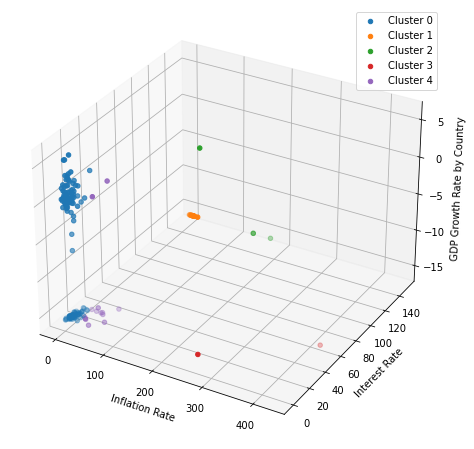

Countries categorized by cluster and saved to 'countries_by_cluster.txt'.


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
# from adjustText import adjust_text

data = pd.read_csv('cleaned.csv')
data.rename(columns={data.columns[0]: 'Country'}, inplace=True)


# Extract individual columns
inflation_rate = data['Inflation Rate']
interest_rate = data['Interest Rate']
gdp_growth_rate = data['GDP Growth Rate by Country']

# Combine the features into a 2D array for clustering
features = data[['Inflation Rate', 'Interest Rate', 'GDP Growth Rate by Country']].values

# Perform K-means clustering with k clusters (you can change the value of k as needed)
k = 5
kmeans = KMeans(n_clusters=k)
data['Cluster'] = kmeans.fit_predict(features)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set labels for each axis
ax.set_xlabel('Inflation Rate')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('GDP Growth Rate by Country')

# Plot the data points with different colors based on clusters
cmap = plt.get_cmap('tab10')

# Plot the data points with colors based on clusters
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Inflation Rate'], cluster_data['Interest Rate'], cluster_data['GDP Growth Rate by Country'], 
               marker='o', label=f'Cluster {cluster}', c=[cmap(cluster)])

# Show the legend for cluster labels
ax.legend()

# Show the plot
plt.show()

# Create a dictionary to store countries by cluster
countries_by_cluster = {}
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    countries_by_cluster[f'Cluster {cluster}'] = cluster_data['Country'].tolist()

# Write the dictionary to a text file
with open('countries_by_cluster.txt', 'w') as file:
    for cluster, countries in countries_by_cluster.items():
        file.write(f'{cluster}:\n')
        for country in countries:
            file.write(f'{country}\n')
        file.write('\n')

print("Countries categorized by cluster and saved to 'countries_by_cluster.txt'.")